In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scipy.stats as stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sc.settings.n_jobs = 8
sc.set_figure_params(dpi=100, dpi_save=600, frameon=False, figsize=(5,5))
mpl.rcParams['pdf.fonttype'] = 42
plt.rcParams["font.family"] = "Arial"
%config InlineBackend.figure_format = 'retina'

In [7]:
adata = sc.read_h5ad('../data/cxg_tg.h5ad', backed='r')
adata = adata[(adata.obs.MetaType.isin(['Neurons','SGC'])) & (adata.obs.Conditions == 'Naive')].to_memory()
adata.layers['counts'] = adata.raw.X.copy()
adata.layers['scVI_gene'] = adata.X.copy()
adata.X = adata.layers['counts'].copy()
adata.obs.Source = adata.obs.Source.apply(lambda x: f"Techameena_{x.split('_')[-1]}" if x.startswith('Lab') else x)
del adata.raw
adata.var_names = adata.var.feature_name.to_list()
adata.var_names_make_unique()

In [14]:
adata.obs.MetaType = adata.obs.NociceptiveType.copy()
adata.obs.MetaType = adata.obs.MetaType.apply(lambda x: 'NFs' if x.startswith('NF') else x)

In [18]:
adata = adata[(adata.obs.MetaType.isin(['Nociceptors','NFs'])) & (adata.obs.Conditions == 'Naive')].copy()

In [19]:
def pp(adata):
    sc.pp.normalize_total(adata)
    sc.pp.log1p(adata)
    adata.layers['log_norm'] = adata.X.copy()
    return adata

In [20]:
adatas = [adata[adata.obs.Source == source].copy() for source in adata.obs.Source.cat.categories]
adatas = [pp(adata) for adata in adatas]

In [21]:
adata_neu = sc.concat(adatas)
sc.pp.filter_genes(adata_neu, min_cells=3)

In [22]:
sc.pp.neighbors(adata_neu, use_rep='X_scANVI', metric='cosine')
sc.tl.umap(adata_neu, min_dist=0.3)

In [23]:
adata_neu.obs.MetaType = adata_neu.obs.NociceptiveType.copy()
adata_neu.obs.MetaType = adata_neu.obs.MetaType.apply(lambda x: 'NFs' if x.startswith('NF') else x)

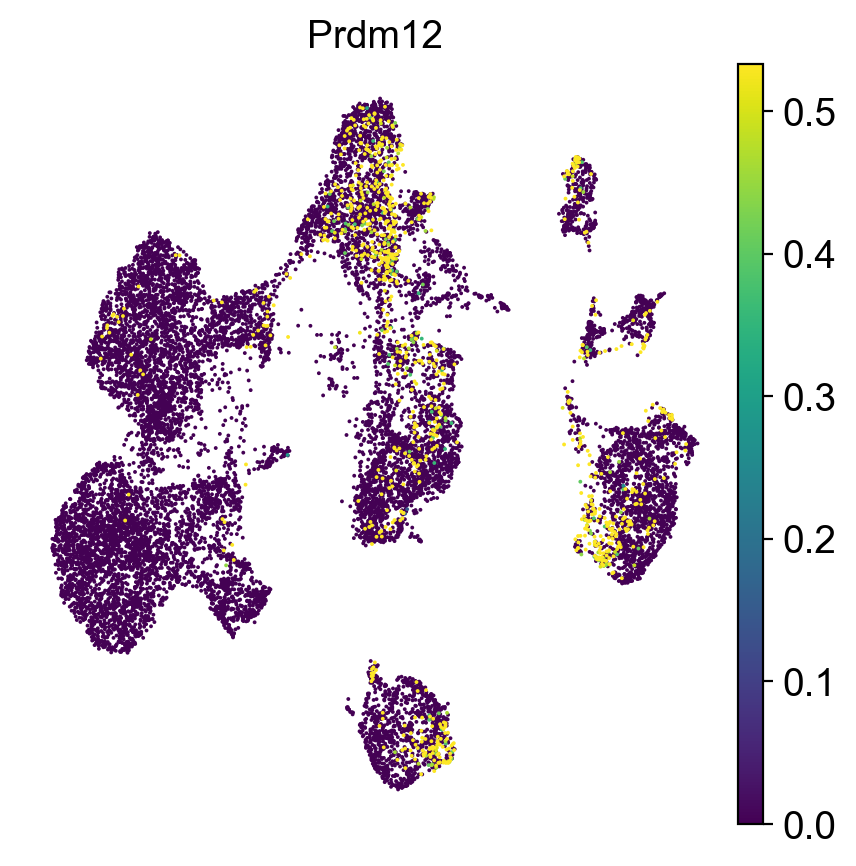

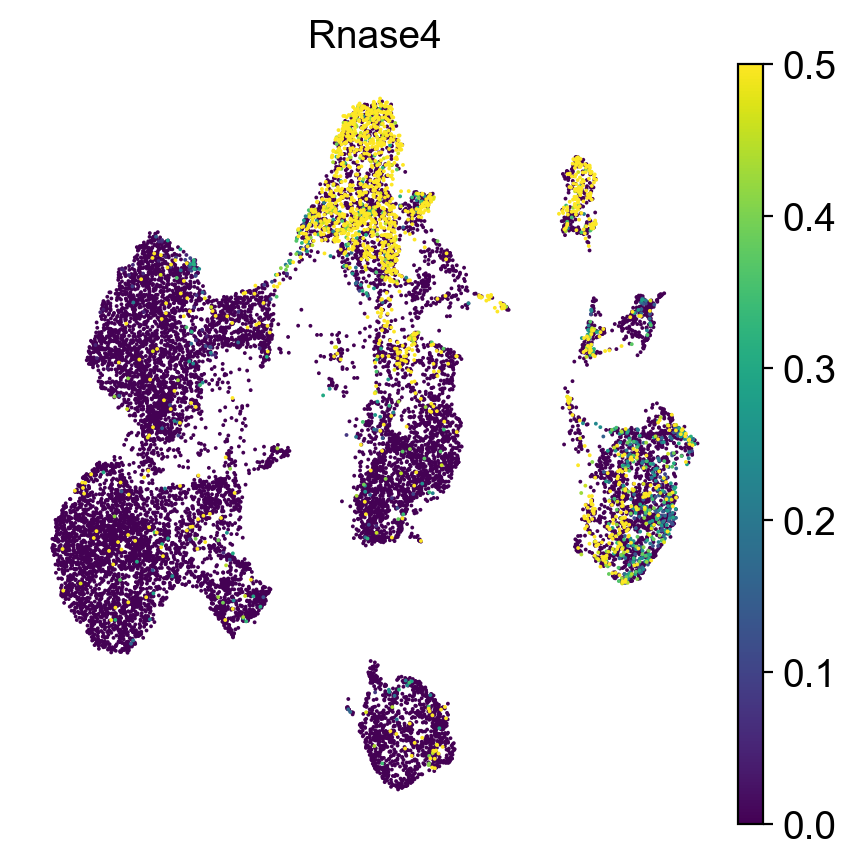

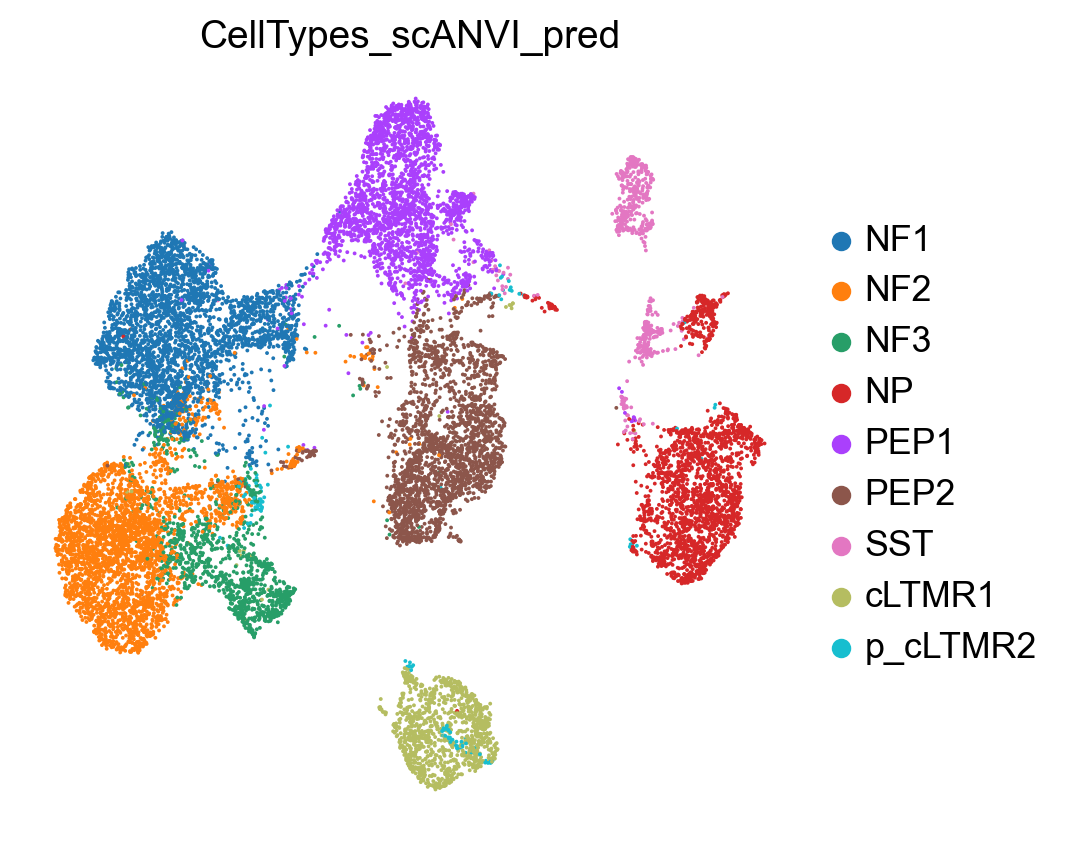

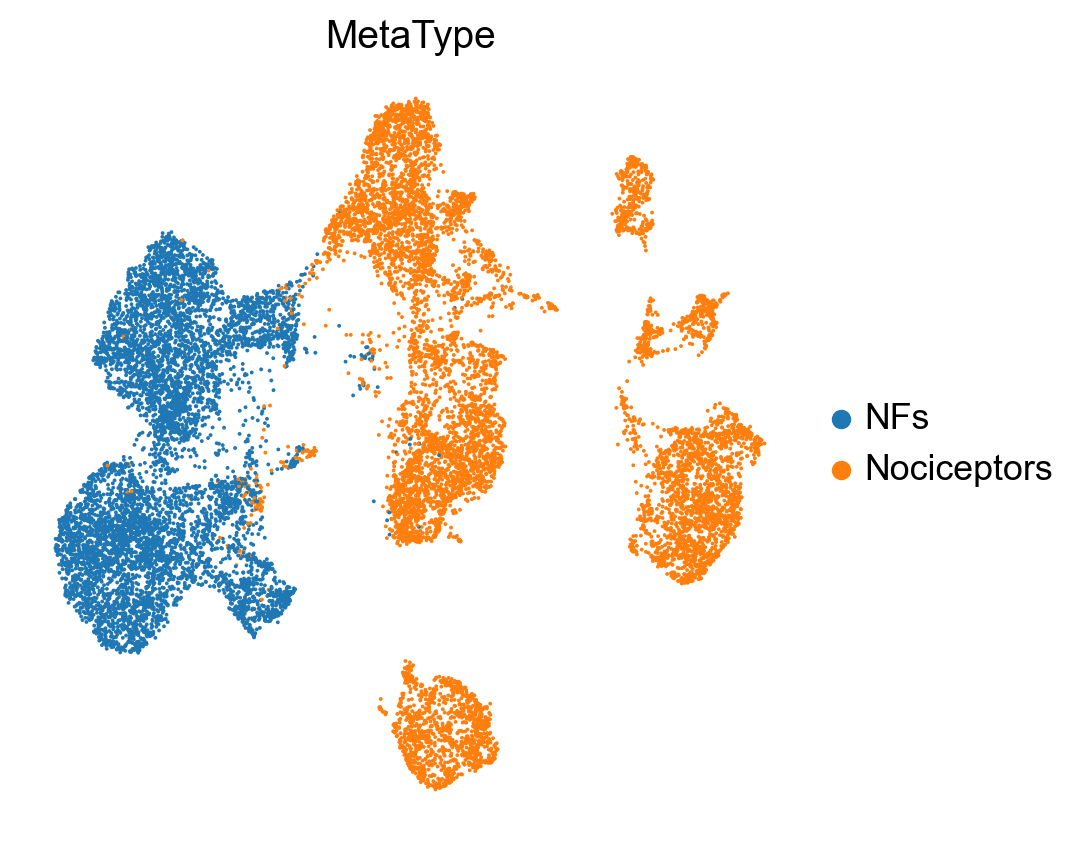

In [24]:
sc.pl.umap(adata_neu, color=['Prdm12'], vmin=0, vmax='p95', layer='log_norm', save='_TG_neurons_Prdm12.pdf')
sc.pl.umap(adata_neu, color=['Rnase4'], vmin=0, vmax=0.5, layer='log_norm', save='_TG_neurons_Rnase4.pdf')
sc.pl.umap(adata_neu, color=['CellTypes_scANVI_pred'], save='_TG_neurons_CellTypes_scANVI_pred.pdf')
sc.pl.umap(adata_neu, color=['MetaType'], save='_TG_neurons_MetaType.pdf')

In [25]:
# adata_neu.write_h5ad('./Results/02_neurons_TG.h5ad', compression='gzip')

In [2]:
adata_neu = sc.read_h5ad('./Results/02_neurons_TG.h5ad')

In [3]:
sk_color = {
 'NF1': '#ffd900',
 'NF2': '#ff8c00',
 'NF3': '#ff4040',
 'NP': '#67cd00',
 'PEP1': '#87cefa',
 'PEP2': '#1c86ee',
 'SST': '#104e8b',
 'cLTMR1': '#98f5ff',
 'p_cLTMR2': '#00ced1',
 'NFs': '#104e8b',
 'Nociceptors': '#ff8c00'
 }

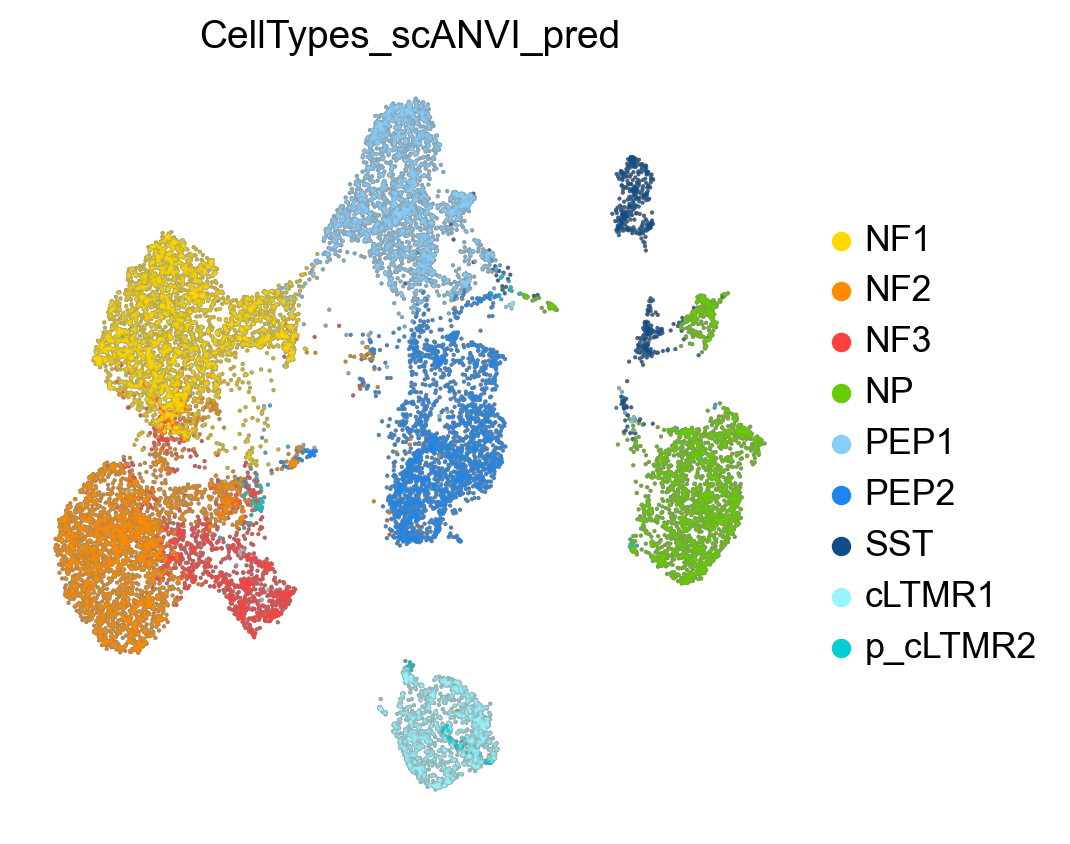

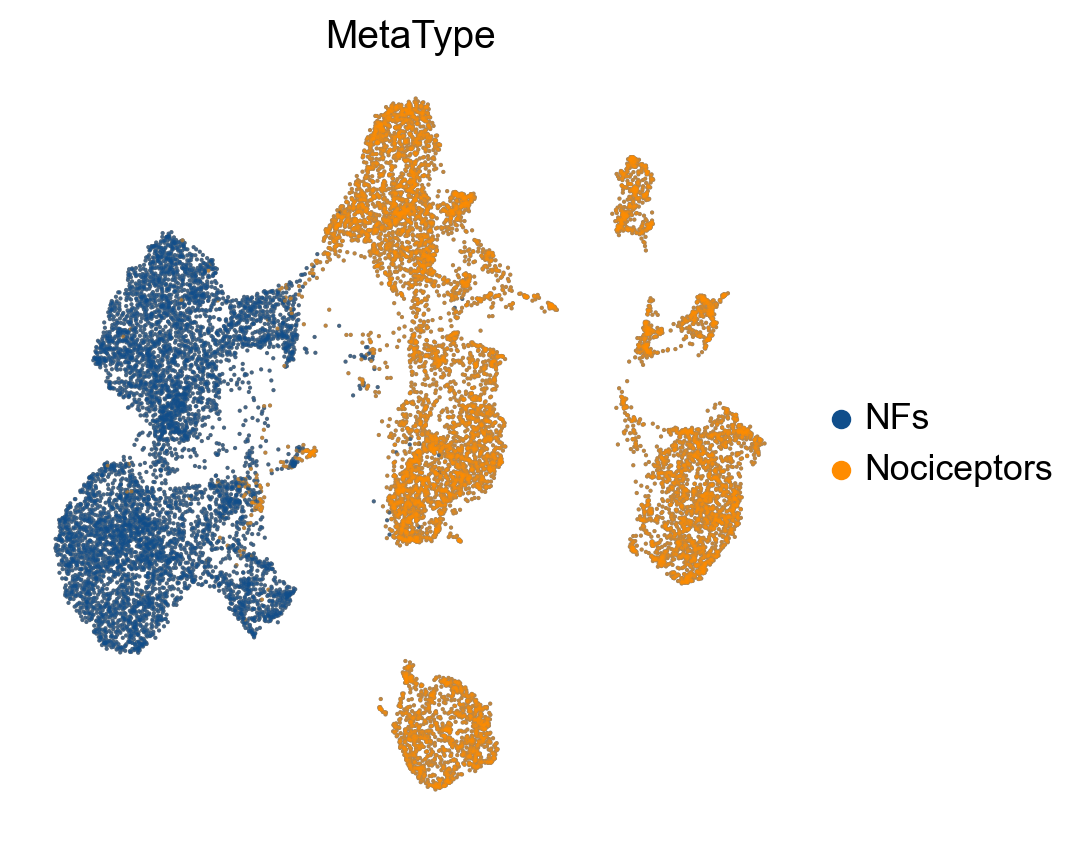

In [4]:
sc.pl.umap(adata_neu, color=['CellTypes_scANVI_pred'], palette=sk_color, alpha=0.5, legend_fontoutline=2,
           add_outline=True, outline_color=('white','grey'), outline_width=(0, 0.05), save='_TG_neurons_CellTypes_scANVI_pred_new_params.pdf')
sc.pl.umap(adata_neu, color=['MetaType'], palette=sk_color, alpha=0.5, legend_fontoutline=2,
           add_outline=True, outline_color=('white','grey'), outline_width=(0, 0.05), save='_TG_neurons_MetaType_new_params.pdf')